# <font color='red'>House Price Prediction in King County, Washington State, USA
Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in **King County, Washington State, USA** using **Multiple Linear Regression (MLR)**. The dataset consists of historical data of houses sold between May 2014 to May 2015. 

Our objective is to predict the sales prices of houses in King County with an accuracy of at least **75-80%** and to understand which factors contribute to higher property values, specifically those priced at **$650,000 and above**.

The dataset consists of house prices from **King County**, an area in the U.S. State of Washington, and also covers **Seattle**. The dataset was obtained from **Kaggle** and was published under the **CC0: Public Domain** license. Unfortunately, the user who provided the data on Kaggle did not indicate the original source of the data. Further details on the citation and database description can be found in the **Glossary and Bibliography** sections of this report.

The dataset contains **21 variables** and **21,613 observations**.


<img src='https://media.istockphoto.com/id/875957442/photo/aerial-view-of-bellevue-washington.jpg?s=612x612&w=0&k=20&c=7xjEBEmukz8Fy9ygwmxUEEFZ1sfw7T-RlK_mV_jbqJ0='>

# <font color='red'>Requirements

In [110]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',55)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('kc_house_data.csv')

In [7]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

# <font color='red'>EDA (Exploratory Data Analysis)

In [12]:
df.head(1)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3        1.0         1180   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   

   sqft_living15  sqft_lot15  
0           1340        5650

In [14]:
df.sample(3)

id             date     price  bedrooms  bathrooms  \
11178  7212660520  20150326T000000  280000.0         4        2.0   
14603  2624049103  20150325T000000  449000.0         2        1.0   
21361  3123089027  20140721T000000  472000.0         3        2.5   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11178         1600      6861     1.0           0     0          3      7   
14603         1250      4576     1.0           0     0          3      6   
21361         3800    104979     2.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11178        1600              0      1994             0    98003  47.2701   
14603        1040            210      1925             0    98118  47.5387   
21361        3210            590      2005             0    98045  47.4304   

          long  sqft_living15  sqft_lot15  
11178 -122.313           1870        7455  
14603 -122.266           1550        5000  
21361 -121.841           2040      109771

In [16]:
df.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [22]:
df.corr(numeric_only=True)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

In [24]:
df['price'].mean(),df['price'].median(),df['price'].min(),df['price'].max(),df['price'].std()

(540088.1417665294, 450000.0, 75000.0, 7700000.0, 367127.1964826997)

In [26]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [28]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [32]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

# <font color='red'>Data Visualization

<Axes: >

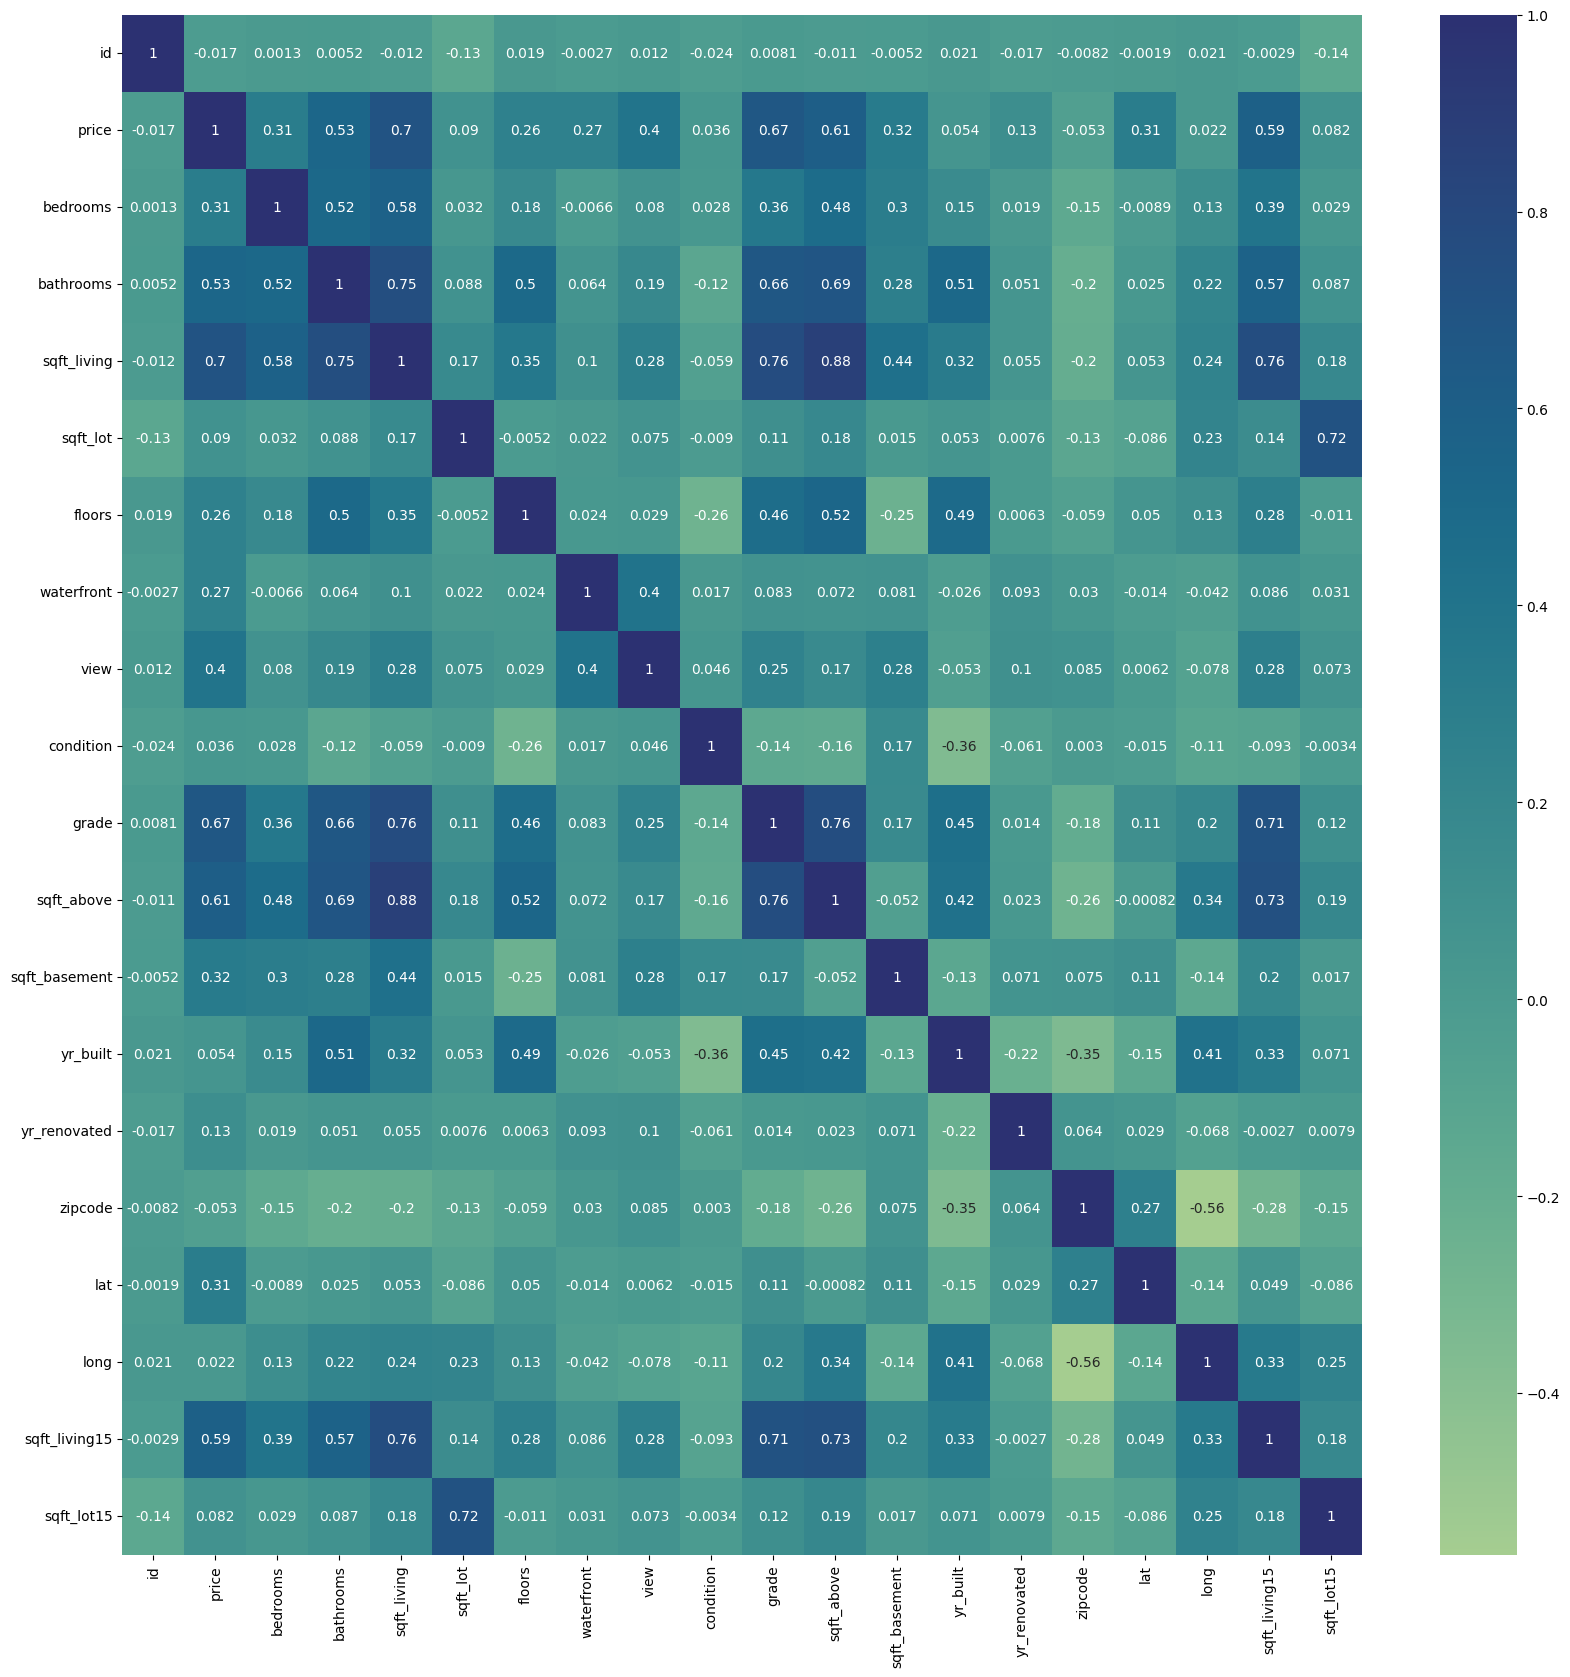

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest')

<Axes: xlabel='bedrooms'>

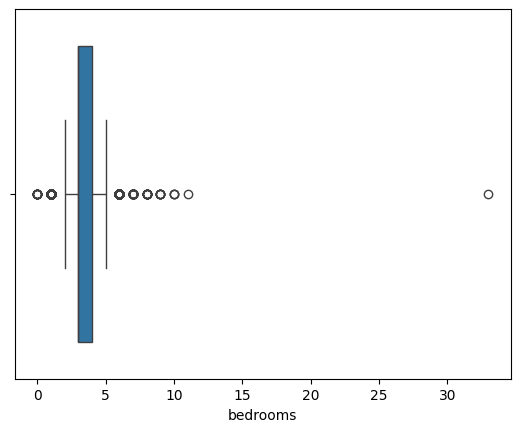

In [45]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='bathrooms'>

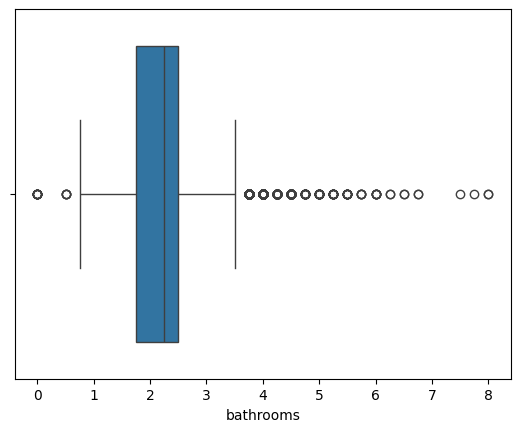

In [49]:
sns.boxplot(x=df['bathrooms'])

<Axes: xlabel='sqft_living'>

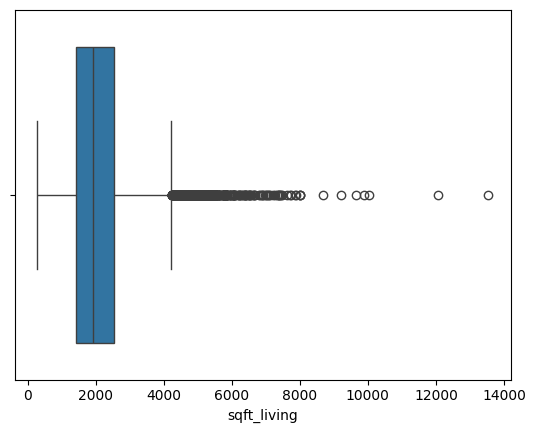

In [53]:
sns.boxplot(x=df['sqft_living'])

<Axes: xlabel='bedrooms', ylabel='Density'>

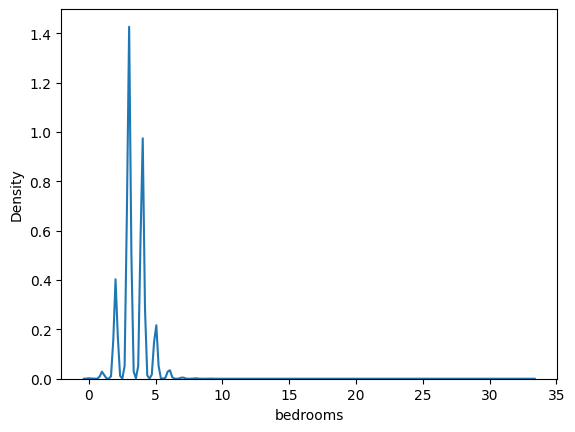

In [55]:
sns.kdeplot(x=df['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='Count'>

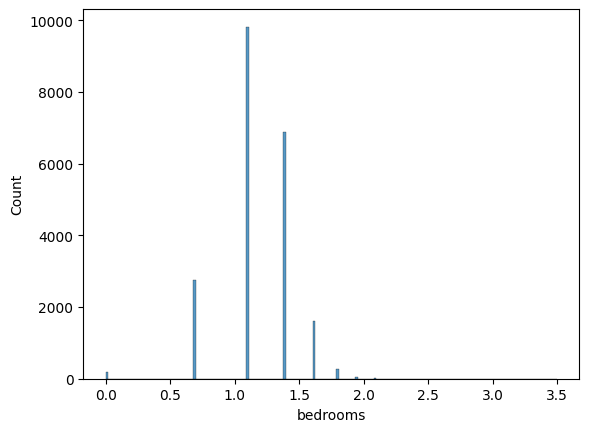

In [63]:
sns.histplot(x=np.log(df['bedrooms']))

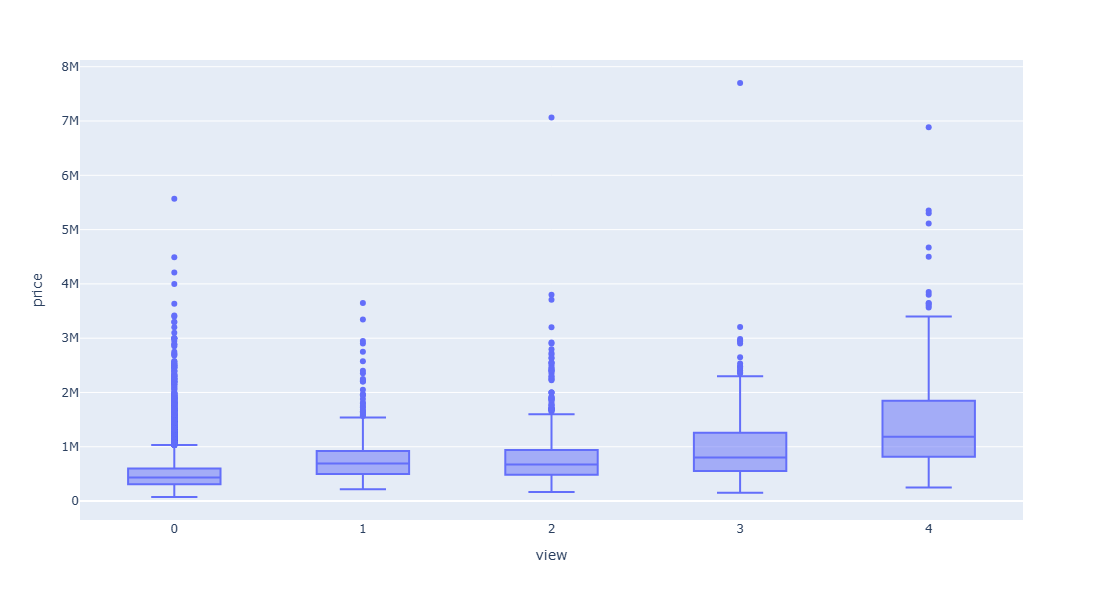

In [35]:
px.box(df, x="view", y="price", width=900, height=600)

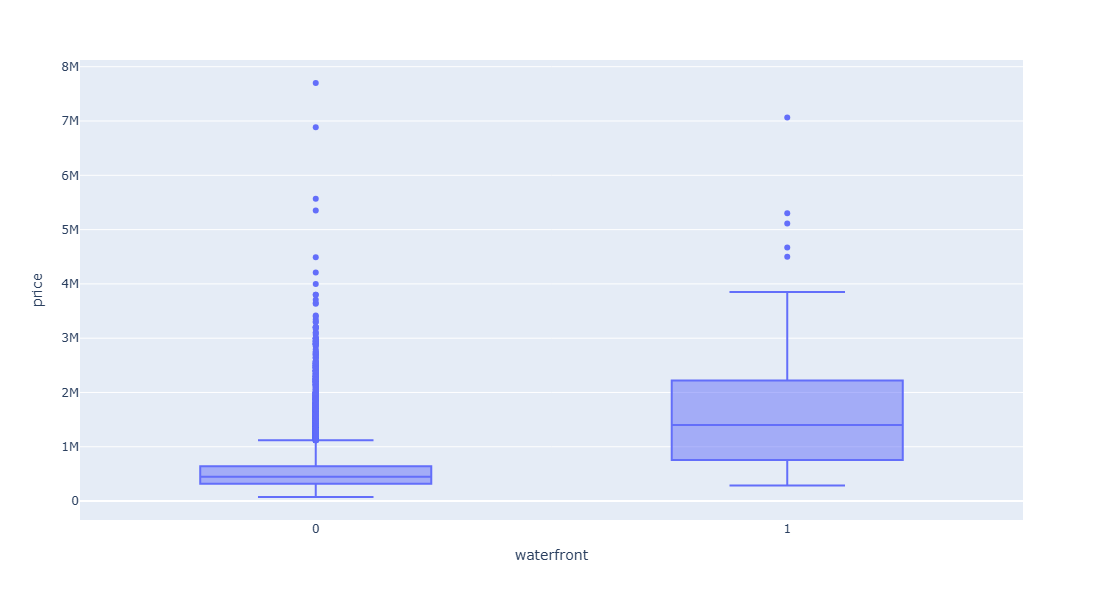

In [37]:
px.box(df, x="waterfront", y="price", width=900, height=600)

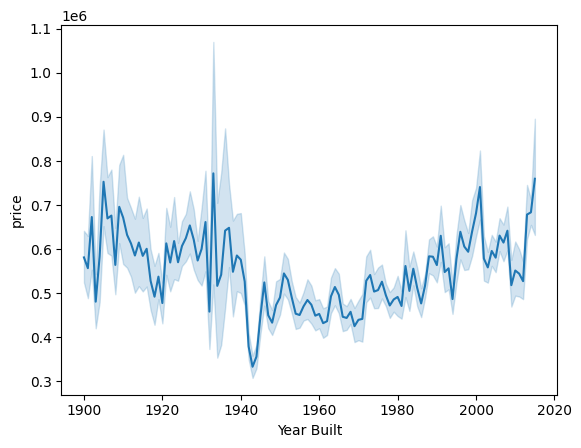

In [39]:
sns.lineplot(data=df, x="yr_built", y="price")
plt.xlabel('Year Built');

In [23]:
px.sunburst(df, path=['bedrooms', 'bathrooms'], values='price')

In [24]:
fig=px.bar(df, x='floors', y='price')
fig.update_layout(plot_bgcolor="lightpink")

# <font color='red'>Outlier Removal

In [66]:
outliers=df.quantile(q=0.97,numeric_only=True)

In [68]:
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['bathrooms']<outliers['bathrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]

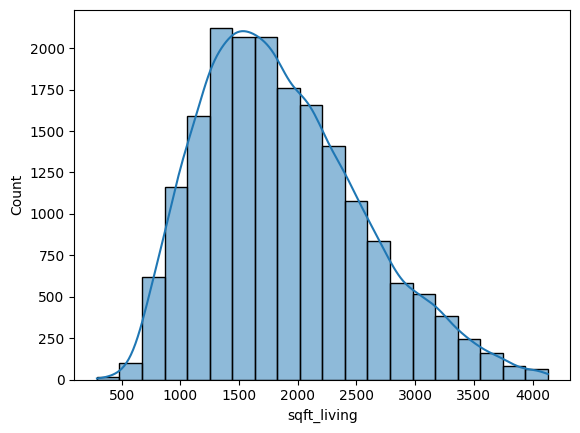

In [72]:
sns.histplot(x=df['sqft_living'],kde=True,bins=20);

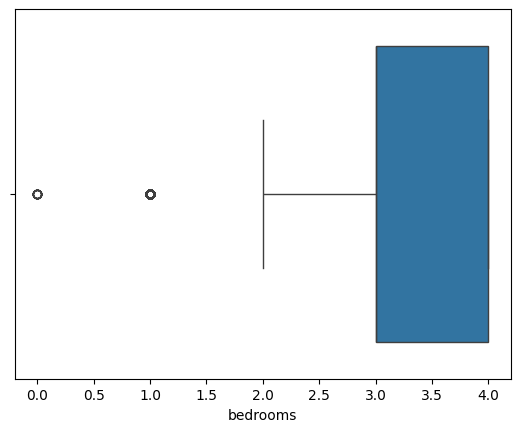

In [76]:
sns.boxplot(x=df['bedrooms']);

# <font color='red'>Feature Engineering

In [78]:
df['age']=2024-df['yr_built']

In [80]:
df['zipcode']=df['zipcode'].astype('category')

In [82]:
df['sqft_total']=df['sqft_above']+df['sqft_basement']

In [84]:
df['is_renovated']=np.where(df['yr_renovated']>0,1,0)

In [86]:
df_copy=df.copy()

In [88]:
df['sqft_per_floor'] = df['sqft_living'] / df['floors']

In [90]:
df['sale_year'] = pd.to_datetime(df['date']).dt.year

In [92]:
df['sale_month'] = pd.to_datetime(df['date']).dt.month

In [94]:
df['has_basement']=np.where(df['sqft_basement']>0,1,0)

In [96]:
df['is_viewed']=np.where(df['view']>0,1,0)
df=df.drop('view',axis=1)

In [98]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  condition  grade  sqft_above  sqft_basement  \
0      5650     1.0           0          3      7        1180              0   
1      7242     2.0           0          3      7        2170            400   
2     10000     1.0           0          3      6         770              0   
3      5000     1.0           0          5      7        1050            910   
4      8080     1.0           0          3      8        1680              0   

   yr_built  yr_renovated zipcode      lat     long  sqft_living15  \
0      1955             0   98178  47.5112 -122.257           1340   
1      1951          1991   98125  47.7210 -122.319           1690   
2      1933             0   98028  47.7379 -122.233           2720   
3      1965             0   98136  47.5208 -122.393           1360   
4      1987             0   98074  47.6168 -122.045           1800   

   sqft_lot15  age  sqft_total  is_renovated  sqft_per_floor  sale_year  \
0        5650   69        1180             0          1180.0       2014   
1        7639   73        2570             1          1285.0       2014   
2        8062   91         770             0           770.0       2015   
3        5000   59        1960             0          1960.0       2014   
4        7503   37        1680             0          1680.0       2015   

   sale_month  has_basement  is_viewed  
0          10             0          0  
1          12             1          0  
2           2             0          0  
3          12             1          0  
4           2             0          0

# <font color='red'>Model

In [100]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price             1.000000
grade             0.613276
sqft_living       0.599908
sqft_total        0.599908
sqft_living15     0.550073
sqft_above        0.490733
lat               0.427376
bathrooms         0.396772
sqft_per_floor    0.323602
is_viewed         0.271969
bedrooms          0.258517
floors            0.241076
sqft_basement     0.231660
has_basement      0.164835
yr_renovated      0.100471
is_renovated      0.100101
waterfront        0.097837
sqft_lot          0.075785
condition         0.066155
sqft_lot15        0.065667
long              0.022943
id                0.014108
yr_built          0.010752
sale_year         0.003744
age               0.010752
sale_month        0.013468
Name: price, dtype: float64

In [102]:
x=df.drop(['id','date','lat','long','price'],axis=1) 
y=df[['price']]

In [104]:
x=pd.get_dummies(x,drop_first=True)

In [114]:
def algo_test(x,y):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    return r_table

In [112]:
algo_test(x,y)

R_Squared           RMSE            MAE
XGBReggressor           0.836299   86178.841257   60414.414351
Linear                  0.834499   86651.345042   62420.968805
Lasso                   0.833853   86820.246835   62550.661462
Ridge                   0.832901   87068.626323   62768.246469
Gradient Bossting       0.750316  106431.559482   80450.006878
Extra Tree              0.618484  131562.277459   88463.499730
DecisionTreeRegressor   0.577584  138434.861058   94959.529698
ElasticNet              0.557504  141686.963420  109102.140750
KNeighborRegressor      0.421039  162068.995556  121644.830346

# <font color='red'> Feature Importance

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lrmodel=lr.fit(x_train,y_train)

In [128]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})

In [131]:
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)

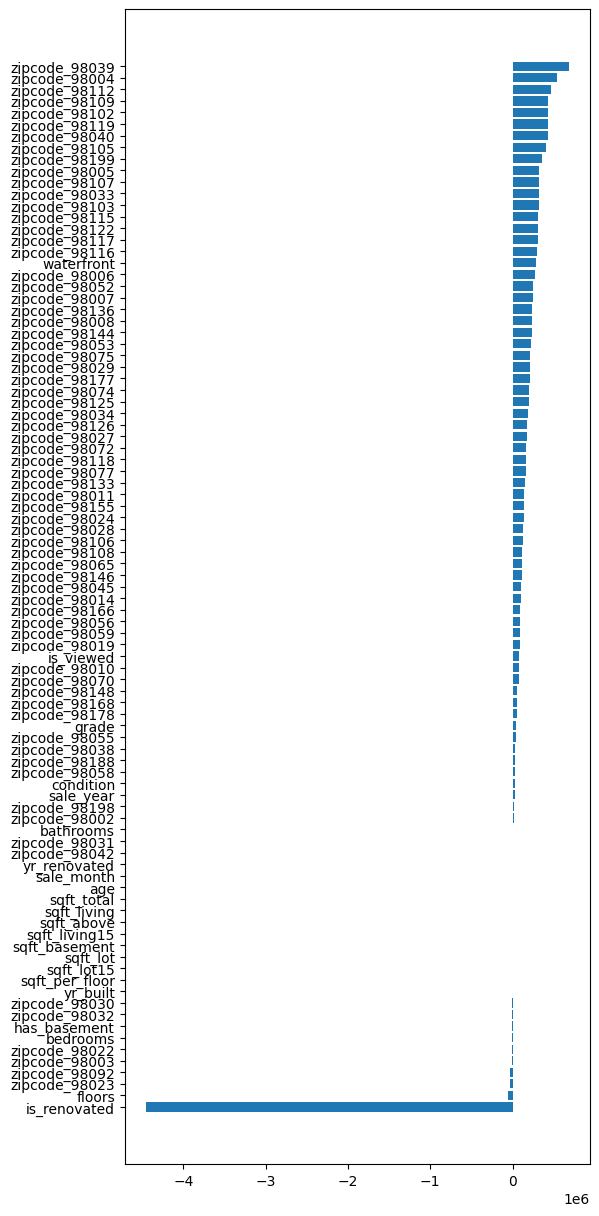

In [137]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

# <font color='red'>Model Performance Summary

Based on the performance evaluation of several regression models, the **XGBoost Regressor** demonstrated the best results with an \( R^2 \) score of 0.836, a relatively low RMSE of 86,178.84, and the smallest MAE at 60,414.41, indicating it has the highest predictive accuracy among the models tested. 

**Linear Regression** was a close second, with an \( R^2 \) score of 0.834, an RMSE of 86,651.35, and an MAE of 62,420.97. Traditional linear models like **Lasso** and **Ridge** produced similar \( R^2 \) values around 0.833 and RMSEs just above 86,800, reflecting reasonable but slightly lower performance. 

In contrast, **Gradient Boosting** had a moderate \( R^2 \) of 0.750 and a higher RMSE of 106,431.56, making it less suitable for this dataset. **Extra Tree** and **Decision Tree Regressors** had notably lower \( R^2 \) scores of 0.618 and 0.578, respectively, with RMSE values exceeding 130,000, suggesting limited accuracy. 

Finally, **ElasticNet** had the lowest \( R^2 \) score at 0.558 and the highest RMSE of 141,687, indicating it may not be an ideal fit for this dataset. 

In summary, **XGBoost** stands out as the most effective model, offering a balance of accuracy and error minimization.
